# Pivot points - Analytics

In [22]:
##Relation ship
#data['rate_x'] = data.apply(lambda r: 100 * (r['Close'] - r['prev_Close']) / r['prev_Close'], axis=1)
#data['rate_y'] = data.apply(lambda r: (r['Close'] - r['Open']) / (r['High'] - r['Low']), axis=1)

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data_tmp = dataset.copy()

In [4]:
def prepareData(htd):
    _1_d_df = htd.copy()
    _1_d_df = _1_d_df.resample("D").agg({
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
    _1_d_df.dropna(inplace=True)
    _1_d_df = cal_pivots(_1_d_df)
    _1_d_df = _1_d_df[['P', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Close']].rename(columns={'Close': 'Day_Close'})
    _1_d_df.dropna(inplace=True)

    htd = htd.assign(time_d=pd.PeriodIndex(htd.index, freq='1D').to_timestamp())
    htd = pd.merge(htd, _1_d_df, left_on="time_d", right_index=True, how="left")
    htd.dropna(inplace=True)
    return htd


def cal_first_open(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 900]
    return tick


def cal_first_close(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 900]
    return tick


def cal_second_open(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 905]
    return tick


def cal_second_close(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 905]
    return tick


def cal_pivot(row):
    pivot = (row['High_s'] + row['Low_s'] + row['Close_s']) / 3
    return pivot


def cal_r1(row):
    result = 2 * row['P'] - row['Low_s']
    return result


def cal_r2(row):
    result = row['P'] + row['High_s'] - row['Low_s']
    return result


def cal_r3(row):
    # result = row['P'] + 2 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 2 + row['High_s'] - 2 * row['Low_s']
    return result


def cal_r4(row):
    # result = row['P'] + 3 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 3 + row['High_s'] - 3 * row['Low_s']
    return result


def cal_r5(row):
    # result = row['P'] + 4 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 4 + row['High_s'] - 4 * row['Low_s']
    return result


def cal_r6(row):
    # result = row['P'] + 5 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 5 + row['High_s'] - 5 * row['Low_s']
    return result


def cal_s1(row):
    result = 2 * row['P'] - row['High_s']
    return result


def cal_s2(row):
    result = row['P'] - (row['High_s'] - row['Low_s'])
    return result


def cal_s3(row):
    # result = row['P'] - 2 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 2 - (2 * row['High_s'] - row['Low_s'])
    return result


def cal_s4(row):
    # result = row['P'] - 3 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 3 - (3 * row['High_s'] - row['Low_s'])
    return result


def cal_s5(row):
    # result = row['P'] - 4 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 4 - (4 * row['High_s'] - row['Low_s'])
    return result


def cal_s6(row):
    # result = row['P'] - 5 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 5 - (5 * row['High_s'] - row['Low_s'])
    return result


def cal_pivots(_1_d_df):
    _1_d_df['High_s'] = _1_d_df['High'].shift(1)
    _1_d_df['Low_s'] = _1_d_df['Low'].shift(1)
    _1_d_df['Close_s'] = _1_d_df['Close'].shift(1)
    _1_d_df['P'] = _1_d_df.apply(
        lambda row: cal_pivot(row), axis=1)
    _1_d_df['R1'] = _1_d_df.apply(
        lambda row: cal_r1(row), axis=1)
    _1_d_df['R2'] = _1_d_df.apply(
        lambda row: cal_r2(row), axis=1)
    _1_d_df['R3'] = _1_d_df.apply(
        lambda row: cal_r3(row), axis=1)
    _1_d_df['R4'] = _1_d_df.apply(
        lambda row: cal_r4(row), axis=1)
    _1_d_df['R5'] = _1_d_df.apply(
        lambda row: cal_r5(row), axis=1)
    _1_d_df['R6'] = _1_d_df.apply(
        lambda row: cal_r6(row), axis=1)
    _1_d_df['S1'] = _1_d_df.apply(
        lambda row: cal_s1(row), axis=1)
    _1_d_df['S2'] = _1_d_df.apply(
        lambda row: cal_s2(row), axis=1)
    _1_d_df['S3'] = _1_d_df.apply(
        lambda row: cal_s3(row), axis=1)
    _1_d_df['S4'] = _1_d_df.apply(
        lambda row: cal_s4(row), axis=1)
    _1_d_df['S5'] = _1_d_df.apply(
        lambda row: cal_s5(row), axis=1)
    _1_d_df['S6'] = _1_d_df.apply(
        lambda row: cal_s6(row), axis=1)
    return _1_d_df

In [5]:
data = prepareData(data_tmp)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,R4,R5,R6,S1,S2,S3,S4,S5,S6,Day_Close
Date,,,,,,,,,,,,,,,,,,,,
2018-08-14 09:00:00,955.5,955.5,954.7,954.9,1103,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
2018-08-14 09:05:00,954.8,955.0,954.3,955.0,530,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
2018-08-14 09:10:00,955.0,955.1,954.7,955.0,509,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
2018-08-14 09:15:00,955.0,957.0,955.0,956.9,1758,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
2018-08-14 09:20:00,956.5,956.6,955.6,955.8,1230,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,9058,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,1331.7,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1
2024-07-19 14:20:00,1299.1,1301.8,1295.3,1301.6,12762,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,1331.7,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1
2024-07-19 14:25:00,1302.4,1302.6,1300.1,1302.2,8096,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,1331.7,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1


In [6]:
data['prev_Close'] = data['Close'].shift(1)
data = data[data.High != data.Low]
data['rate_x'] = data.apply(lambda r: 100 * (r['Close'] - r['prev_Close']) / r['prev_Close'], axis=1)
data['rate_y'] = data.apply(lambda r: (r['Close'] - r['Open']) / (r['High'] - r['Low']), axis=1)

In [7]:
data.dropna(inplace=True)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,S1,S2,S3,S4,S5,S6,Day_Close,prev_Close,rate_x,rate_y
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-14 09:05:00,954.8,955.0,954.3,955.0,530,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3,954.9,0.010472,0.285714
2018-08-14 09:10:00,955.0,955.1,954.7,955.0,509,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3,955.0,0.000000,0.000000
2018-08-14 09:15:00,955.0,957.0,955.0,956.9,1758,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3,955.0,0.198953,0.950000
2018-08-14 09:20:00,956.5,956.6,955.6,955.8,1230,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3,956.9,-0.114955,-0.700000
2018-08-14 09:25:00,955.8,956.0,955.2,955.5,1628,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3,955.8,-0.031387,-0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:05:00,1301.9,1301.9,1297.9,1298.0,10112,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1301.9,-0.299562,-0.975000
2024-07-19 14:10:00,1297.9,1302.5,1297.6,1301.4,11679,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1298.0,0.261941,0.714286
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,9058,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1301.4,-0.145997,-0.515152


### Calcualting return

In [8]:
def cal_cross(row):
    cross = ''
    if row['Low'] < row['S4'] < row['High'] or row['Low'] < row['S3'] < row['High'] or \
                row['Low'] < row['S2'] < row['High'] or row['Low'] < row['S1'] < row['High']:
        cross = 'cross_s'
    elif row['Low'] < row['R1'] < row['High']\
                or row['Low'] < row['R2'] < row['High'] or row['Low'] < row['R3'] < row['High']\
                or row['Low'] < row['R4'] < row['High']:
        cross = 'cross_r'
    elif row['Low'] < row['P'] < row['High']:
        cross = 'cross_p'
    return cross
data['cross'] = data.apply(lambda r: cal_cross(r), axis=1)

In [9]:
working_data = data[data['cross'] != '']

In [10]:
from cal_return_pivots import cal_return
working_data = cal_return(working_data)

In [11]:
working_data = working_data[100*working_data.index.hour + working_data.index.minute < 1420]

In [12]:
working_data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,S4,S5,S6,Day_Close,prev_Close,rate_x,rate_y,cross,return,exit_time
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-14 13:40:00,957.3,958.6,957.3,958.3,2787,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,929.6,925.366667,921.133333,959.3,957.3,0.104460,0.769231,cross_r,0,
2018-08-14 13:55:00,957.4,959.7,956.8,959.5,2926,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,929.6,925.366667,921.133333,959.3,957.2,0.240284,0.724138,cross_r,0,
2018-08-15 10:50:00,959.6,959.6,957.5,958.0,3980,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,939.9,935.833333,931.766667,946.6,959.7,-0.177139,-0.761905,cross_p,-6.5,2018-08-15 14:15:00
2018-08-15 10:55:00,958.0,958.7,957.6,958.1,2078,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,939.9,935.833333,931.766667,946.6,958.0,0.010438,0.090909,cross_p,-6.6,2018-08-15 14:15:00
2018-08-15 11:10:00,957.6,958.3,957.5,957.7,1515,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,939.9,935.833333,931.766667,946.6,958.0,-0.031315,0.125000,cross_p,-6.2,2018-08-15 14:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18 14:10:00,1293.1,1293.1,1290.5,1291.6,5161,2024-07-18,1306.566667,1318.433333,1333.666667,1345.533333,...,1249.0,1233.766667,1218.533333,1297.5,1293.3,-0.131447,-0.576923,cross_s,2.4,2024-07-18 14:15:00
2024-07-18 14:15:00,1291.4,1294.5,1290.8,1294.0,9232,2024-07-18,1306.566667,1318.433333,1333.666667,1345.533333,...,1249.0,1233.766667,1218.533333,1297.5,1291.6,0.185816,0.702703,cross_s,0,
2024-07-19 09:25:00,1303.2,1309.1,1303.2,1309.0,8842,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1263.3,1255.100000,1246.900000,1297.1,1303.2,0.445058,0.983051,cross_r,-7.4,2024-07-19 14:20:00


In [13]:
working_data['rate_x'].describe()

count    14679.000000
mean        -0.004284
std          0.251665
min         -5.072999
25%         -0.080817
50%          0.000000
75%          0.079959
max          5.526898
Name: rate_x, dtype: float64

In [14]:
working_data['rate_y'].describe()

count    14679.000000
mean         0.003765
std          0.603473
min         -1.000000
25%         -0.555556
50%          0.000000
75%          0.562500
max          1.000000
Name: rate_y, dtype: float64

In [15]:
working_data['rate_x_group'] = pd.qcut(working_data.rate_x, 25)
working_data['rate_y_group'] = pd.qcut(working_data.rate_y, 20)

In [16]:
lsg = working_data.groupby(['rate_x_group', 'rate_y_group'])[['return']].mean()
lsg = lsg.reset_index()
lsg_pivot = lsg.pivot(index="rate_x_group", columns="rate_y_group", values="return").sort_index(ascending=False)
lsg_pivot = lsg_pivot[lsg_pivot.columns].astype(float)

In [17]:
lsg_pivot

rate_y_group,"(-1.001, -0.893]","(-0.893, -0.8]","(-0.8, -0.714]","(-0.714, -0.636]","(-0.636, -0.556]","(-0.556, -0.465]","(-0.465, -0.368]","(-0.368, -0.254]","(-0.254, -0.143]","(-0.143, 0.0]","(0.0, 0.143]","(0.143, 0.267]","(0.267, 0.375]","(0.375, 0.474]","(0.474, 0.562]","(0.562, 0.647]","(0.647, 0.727]","(0.727, 0.808]","(0.808, 0.9]","(0.9, 1.0]"
rate_x_group,,,,,,,,,,,,,,,,,,,,
"(0.353, 5.527]",-6.000000,-25.300000,-1.533333,-1.720000,0.000000,-1.366667,6.271429,-3.050000,8.650000e+00,0.900000,-10.780000,-2.780000,7.612500,-3.778571,1.481481,1.417500,-2.547273,-0.130851,0.121429,-0.214365
"(0.234, 0.353]",-0.900000,NaN,-1.700000,0.000000,0.000000,0.000000,-8.733333,13.300000,-3.150000e+00,0.000000,-34.100000,11.400000,-9.470000,-1.640909,-5.133333,-1.973770,-0.065000,0.295000,-1.240741,-0.276596
"(0.174, 0.234]",-3.400000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.033333,1.750000,-7.300000,-1.578571,-2.102941,2.371111,-0.320312,-0.241975,-1.219643,-1.140336,0.825243
"(0.135, 0.174]",0.000000,NaN,6.050000,-63.900000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,-19.400000,-7.050000,-2.592857,1.948718,-0.291667,-1.968831,-0.233000,-0.221782,-1.011340,-0.695181
"(0.107, 0.135]",10.000000,NaN,NaN,NaN,NaN,-3.700000,NaN,0.166667,NaN,NaN,1.250000,3.265000,-1.913514,0.312308,-0.517722,-1.163218,0.194186,-1.219118,-0.553165,-1.938983
"(0.0855, 0.107]",NaN,NaN,NaN,NaN,1.950000,10.300000,NaN,-2.600000,NaN,7.650000,-1.600000,-3.516667,-0.341304,-1.125843,-0.953933,-1.763542,-0.444872,0.040000,-1.094118,-1.477778
"(0.0675, 0.0855]",NaN,-10.400000,12.350000,NaN,NaN,NaN,NaN,NaN,NaN,2.100000,-4.950000,1.441176,-1.469231,-0.335443,0.549474,-0.908333,0.106410,0.185417,-0.850000,-0.954545
"(0.0534, 0.0675]",NaN,NaN,NaN,-1.800000,NaN,NaN,NaN,NaN,-2.360000e+01,2.466667,-3.383333,-1.411111,-2.811236,-1.545263,-0.912745,-0.414103,-0.705970,-2.490323,-1.212500,-0.650000
"(0.0397, 0.0534]",-0.200000,NaN,NaN,0.000000,NaN,0.000000,0.100000,-2.900000,1.480000e+01,0.980000,0.828571,-0.297297,0.295413,-0.241837,-0.730769,-0.888889,-1.179592,-1.105405,1.452381,-0.537037


<Axes: xlabel='rate_y_group', ylabel='rate_x_group'>

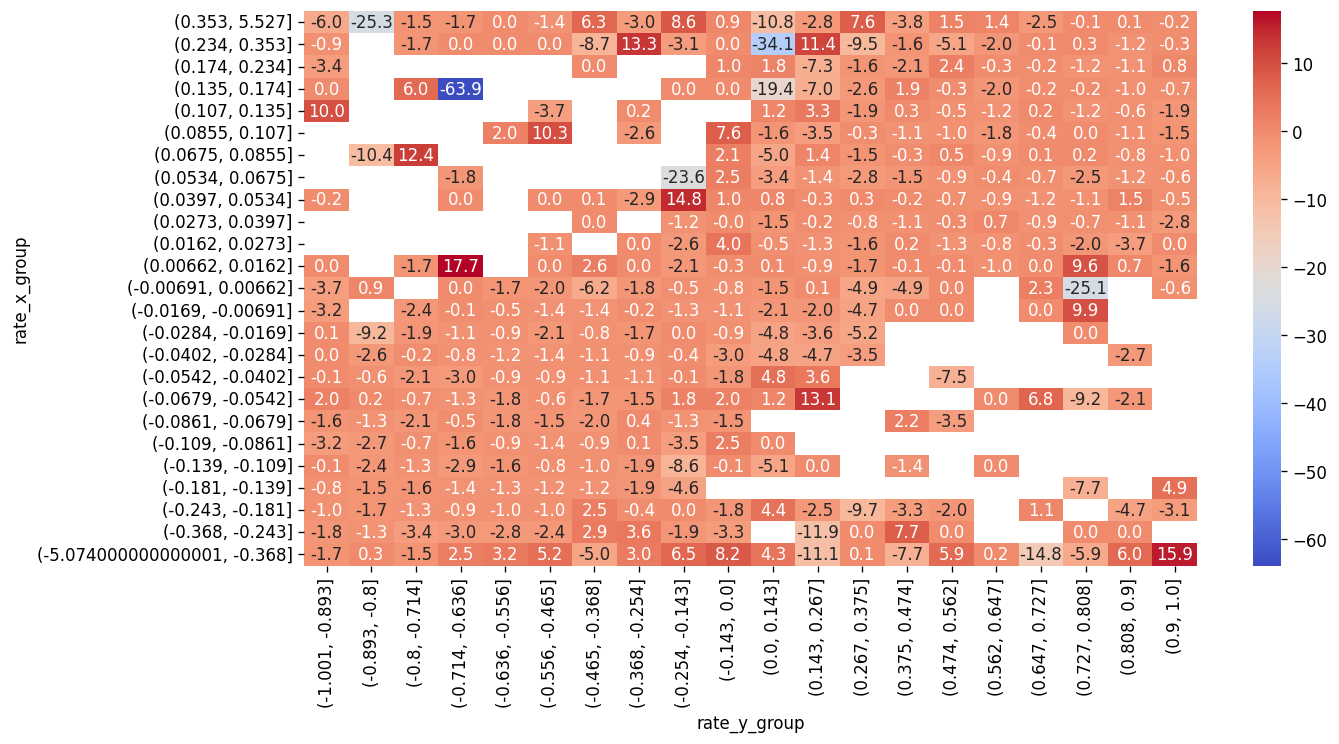

In [18]:
sns.heatmap(lsg_pivot, cmap = 'coolwarm', annot=True, fmt=".1f")

In [19]:
cross_r = working_data[working_data.cross == 'cross_p']
cross_r['rate_y'].describe()

count    5127.000000
mean       -0.000277
std         0.603814
min        -1.000000
25%        -0.555556
50%         0.000000
75%         0.555556
max         1.000000
Name: rate_y, dtype: float64

In [20]:
cross_r['rate_x_group'] = pd.qcut(cross_r.rate_x, 25)
cross_r['rate_y_group'] = pd.qcut(cross_r.rate_y, 20)

<Axes: xlabel='rate_y_group', ylabel='rate_x_group'>

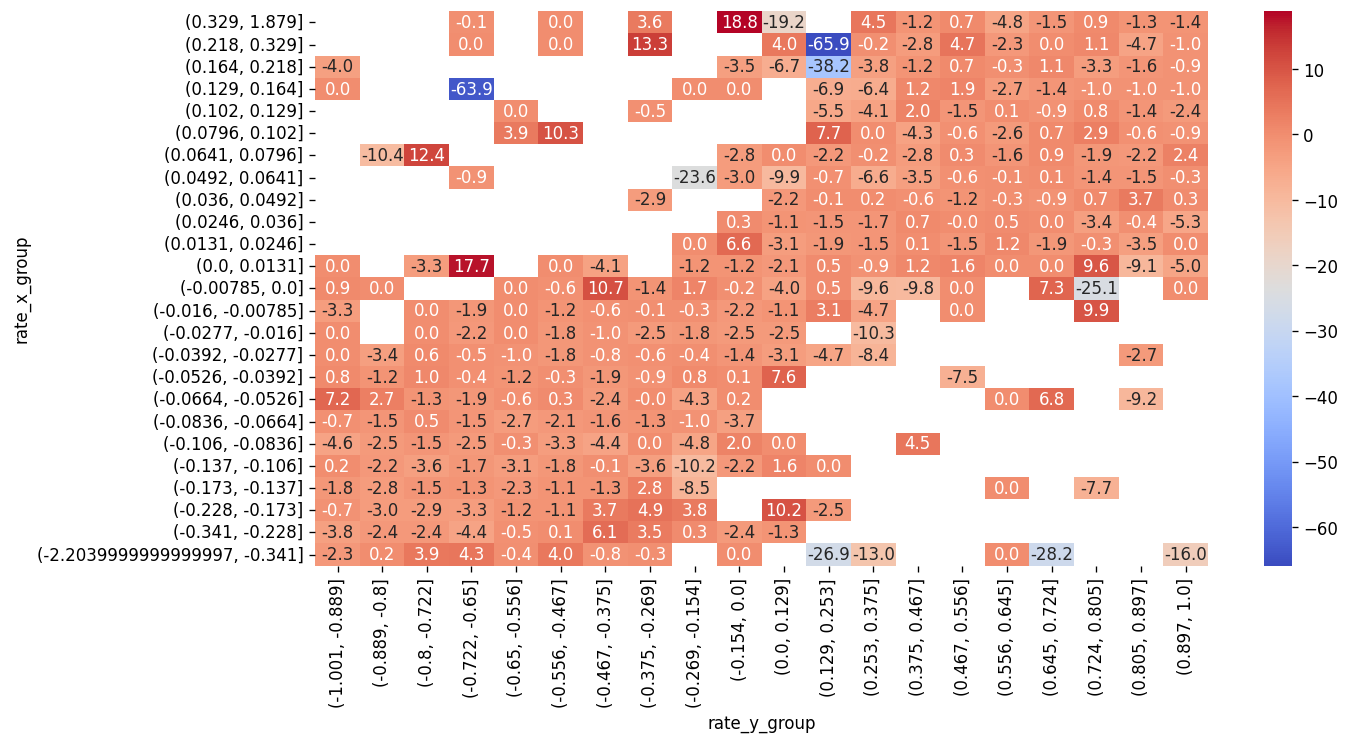

In [21]:
lsg = cross_r.groupby(['rate_x_group', 'rate_y_group'])[['return']].mean()
lsg = lsg.reset_index()
lsg_pivot = lsg.pivot(index="rate_x_group", columns="rate_y_group", values="return").sort_index(ascending=False)
lsg_pivot = lsg_pivot[lsg_pivot.columns].astype(float)
sns.heatmap(lsg_pivot, cmap = 'coolwarm', annot=True, fmt=".1f")